Convert the dataframe

In [991]:
import pandas as pd
df = pd.read_csv ('/home/antonio/PCAP Repo/Presta/realt_capture.csv')

df=df[['time','cpu','ram','pram']]

df['cpu'] = (df['cpu'].str.replace('%', '')
             .astype(float))

df['ram'] = (df['ram'].str.replace("MiB / 909.6MiB", '')
             .astype(float))

df['pram'] = (df['pram'].str.replace('%', '')
             .astype(float))


df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f')

init_time = pd.to_datetime('19:35:17.441547', format='%H:%M:%S.%f')

#df['time']-=init_time

df.head()


/tmp/ipykernel_182252/2606414914.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['ram'] = (df['ram'].str.replace("MiB / 909.6MiB", '')


,time,cpu,ram,pram
0,1900-01-01 19:35:17.441547,1.93,190.0,20.88
1,1900-01-01 19:35:17.934506,1.93,190.0,20.88
2,1900-01-01 19:35:18.434013,2.16,190.0,20.88
3,1900-01-01 19:35:18.934418,2.16,190.0,20.88
4,1900-01-01 19:35:19.433966,2.30,189.9,20.88


In [992]:
import pandas as pd
df_2 = pd.read_csv ('/home/antonio/PCAP Repo/Presta/realt_capture_2.csv')

df_2=df_2[['time','cpu','ram','pram']]

df_2['cpu'] = (df_2['cpu'].str.replace('%', '')
             .astype(float))

df_2['ram'] = (df_2['ram'].str.replace("MiB / 909.6MiB", '')
             .astype(float))

df_2['pram'] = (df_2['pram'].str.replace('%', '')
             .astype(float))

df_2['time'] = pd.to_datetime(df_2['time'], format='%H:%M:%S.%f')

init_time = pd.to_datetime('19:35:17.441547', format='%H:%M:%S.%f')

#df['time']-=init_time

df_2.head()

/tmp/ipykernel_182252/2002728175.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df_2['ram'] = (df_2['ram'].str.replace("MiB / 909.6MiB", '')


,time,cpu,ram,pram
0,1900-01-01 19:47:00.776830,1.42,190.6,20.95
1,1900-01-01 19:47:01.273115,1.42,190.6,20.95
2,1900-01-01 19:47:01.772743,1.59,190.6,20.95
3,1900-01-01 19:47:02.272371,1.59,190.6,20.95
4,1900-01-01 19:47:02.772948,1.63,190.6,20.95


In [993]:
def filter_avg (df,stime=None,ftime=None,wdw=None):
    a=stime+5
    b=ftime-5
    filtered_df_norm=df
    #filtered_norm_avg=filtered_df_norm.query("time > @a and time < @b")
    #filtered_norm_avg=filtered_norm_avg['cpu'].mean()

    filtered_df_norm_avg=filtered_df_norm

    #filtered_df_norm.head()


    #condition = (filtered_df_norm_avg['time'] > stime ) & (filtered_df_norm_avg['time'] < ftime)

    #filtered_df_norm_avg.loc[condition,'cpu']=(filtered_df_norm_avg.loc[condition,'cpu']+filtered_norm_avg)/2
    
    if wdw is None: wdw = 1
    filtered_df_norm_avg['cpu']=filtered_df_norm_avg['cpu'].rolling(wdw).mean()
    return filtered_df_norm_avg

In [994]:

start_time = pd.to_datetime('19:36:40.000000', format='%H:%M:%S.%f')
end_time = pd.to_datetime('19:38:40.000000', format='%H:%M:%S.%f')

filtered_df_norm = df[(df['time'] >= start_time) & (df['time'] <= end_time)]

filtered_df_norm['time']-=start_time

filtered_df_norm['time']=filtered_df_norm['time'].dt.total_seconds()

filtered_df_norm.head()

filtered_df_norm_avg=filter_avg(filtered_df_norm,30,90)



/tmp/ipykernel_182252/2376472283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_norm['time']-=start_time
/tmp/ipykernel_182252/2376472283.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_norm['time']=filtered_df_norm['time'].dt.total_seconds()
/tmp/ipykernel_182252/3333968579.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [995]:
start_time = pd.to_datetime('19:42:45.000000', format='%H:%M:%S.%f')
end_time = pd.to_datetime('19:44:45.000000', format='%H:%M:%S.%f')

filtered_df_1 = df[(df['time'] >= start_time) & (df['time'] <= end_time)]


filtered_df_1['time']-=start_time


filtered_df_1['time']=filtered_df_1['time'].dt.total_seconds()

filtered_df_1.head()

filtered_df_1_avg = filter_avg(filtered_df_1,30,90)

/tmp/ipykernel_182252/1973426085.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_1['time']-=start_time
/tmp/ipykernel_182252/1973426085.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_1['time']=filtered_df_1['time'].dt.total_seconds()
/tmp/ipykernel_182252/3333968579.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [996]:
start_time = pd.to_datetime('19:47:15.000000', format='%H:%M:%S.%f')
end_time = pd.to_datetime('19:49:15.000000', format='%H:%M:%S.%f')

filtered_df_2 = df_2[(df_2['time'] >= start_time) & (df_2['time'] <= end_time)]


filtered_df_2['time']-=start_time


filtered_df_2['time']=filtered_df_2['time'].dt.total_seconds()

filtered_df_2.head()

filtered_df_2_avg = filter_avg(filtered_df_2,30,90)

/tmp/ipykernel_182252/3966878731.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2['time']-=start_time
/tmp/ipykernel_182252/3966878731.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2['time']=filtered_df_2['time'].dt.total_seconds()
/tmp/ipykernel_182252/3333968579.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

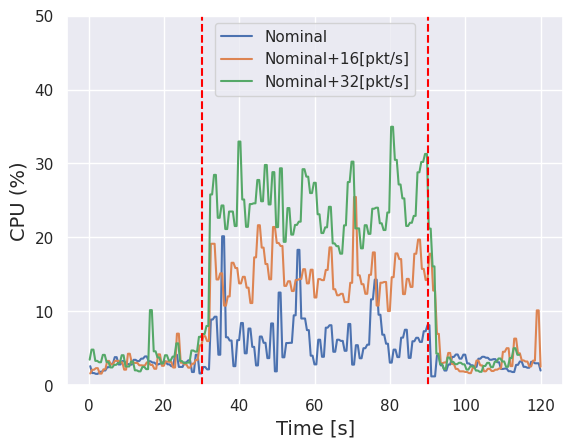

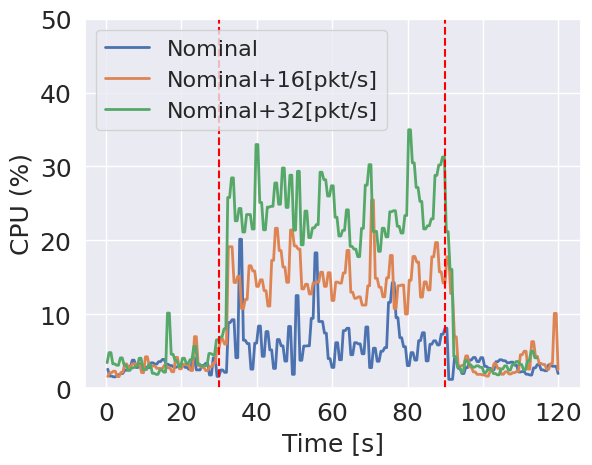

In [997]:
import matplotlib.pyplot as plt

# Plot the values in the 'cpu' column
#df1.plot(y='cpu', label='First time period')
filtered_df_norm.set_index('time', inplace=True)
filtered_df_1.set_index('time', inplace=True)
filtered_df_2.set_index('time', inplace=True)

filtered_df_norm_avg['cpu'].plot(y='CPU Percentage consumption', label='Nominal')
filtered_df_1_avg['cpu'].plot(y='CPU Percentage consumption', label='Nominal+16[pkt/s]')
filtered_df_2_avg['cpu'].plot(y='CPU Percentage consumption', label='Nominal+32[pkt/s]')




plt.xlabel('Time [s]',fontsize=14)
plt.ylabel('CPU (%)',fontsize=14)
plt.axvline(x=30, color='red', linestyle='--')
plt.axvline(x=90, color='red', linestyle='--')
# Show the plot
# Add a legend to the plot
plt.legend()
plt.ylim(0, 50)
# Plot the data

##
#   Another way to Plot
##


fig, ax = plt.subplots()
ax.plot(filtered_df_norm_avg['cpu'], linewidth=2.0, label='Nominal')
ax.plot(filtered_df_1_avg['cpu'], linewidth=2.0, label='Nominal+16[pkt/s]')
ax.plot(filtered_df_2_avg['cpu'], linewidth=2.0, label='Nominal+32[pkt/s]')

ax.set_xlabel('Time [s]', fontsize=18)
ax.set_ylabel('CPU (%)', fontsize=18)

ax.set_ylim(0, 50)
ax.axvline(x=30, color='red', linestyle='--')
ax.axvline(x=90, color='red', linestyle='--')

# Add a legend to the plot
legend = ax.legend(fontsize=16)

# Set the font size for the x and y labels and title
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)

# Show the plot
plt.show()

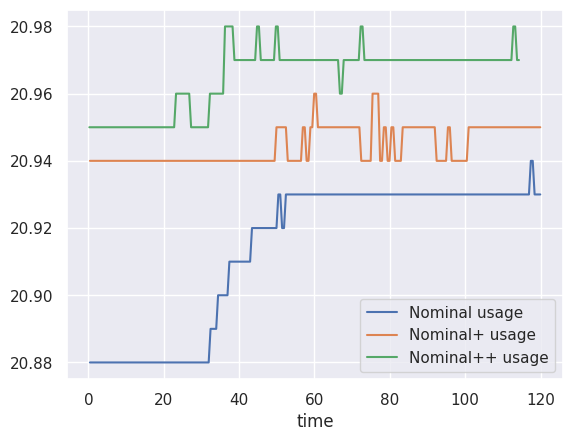

In [998]:
import matplotlib.pyplot as plt

# Plot the values in the 'cpu' column
#df1.plot(y='cpu', label='First time period')
#filtered_df_norm.set_index('time', inplace=True)
#filtered_df_1.set_index('time', inplace=True)
#filtered_df_2.set_index('time', inplace=True)

filtered_df_norm['pram'].plot(y='CPU Percentage consumption', label='Nominal usage')
filtered_df_1['pram'].plot(y='CPU Percentage consumption', label='Nominal+ usage')
filtered_df_2['pram'].plot(y='CPU Percentage consumption', label='Nominal++ usage')

# Show the plot
# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

PCAP Acquisition

In [999]:
import pandas as pd
df = pd.read_csv ('/home/antonio/PCAP Repo/Presta/PCAP_corretto.csv')

df=df[['time','cpu','ram','pram']]

df['cpu'] = (df['cpu'].str.replace('%', '')
             .astype(float))

df['ram'] = (df['ram'].str.replace("MiB / 909.6MiB", '')
             .astype(float))

df['pram'] = (df['pram'].str.replace('%', '')
             .astype(float))


df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f')

init_time = pd.to_datetime('19:35:17.441547', format='%H:%M:%S.%f')

#df['time']-=init_time

df.head()

/tmp/ipykernel_182252/979238883.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['ram'] = (df['ram'].str.replace("MiB / 909.6MiB", '')


,time,cpu,ram,pram
0,1900-01-01 03:15:40.626985,1.63,214.5,23.58
1,1900-01-01 03:15:41.122114,1.63,214.5,23.58
2,1900-01-01 03:15:41.621588,3.24,214.5,23.58
3,1900-01-01 03:15:42.122090,3.24,214.5,23.58
4,1900-01-01 03:15:42.621675,2.14,214.5,23.58


In [1000]:
start_time = pd.to_datetime('03:15:56.000000', format='%H:%M:%S.%f')
end_time = pd.to_datetime('03:17:56.000000', format='%H:%M:%S.%f')

filtered_df_norm = df[(df['time'] >= start_time) & (df['time'] <= end_time)]

filtered_df_norm['time']-=start_time

filtered_df_norm['time']=filtered_df_norm['time'].dt.total_seconds()

filtered_df_norm.head()

filtered_df_norm_avg = filter_avg(filtered_df_norm,30,90)

/tmp/ipykernel_182252/4294793943.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_norm['time']-=start_time
/tmp/ipykernel_182252/4294793943.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_norm['time']=filtered_df_norm['time'].dt.total_seconds()
/tmp/ipykernel_182252/3333968579.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [1001]:
start_time = pd.to_datetime('03:20:27.000000', format='%H:%M:%S.%f')
end_time = pd.to_datetime('03:22:27.000000', format='%H:%M:%S.%f')

filtered_df_1 = df[(df['time'] >= start_time) & (df['time'] <= end_time)]


filtered_df_1['time']-=start_time
filtered_df_1['time']=filtered_df_1['time'].dt.total_seconds()

filtered_df_1_avg = filter_avg(filtered_df_1,30,90)

filtered_df_1.head()

/tmp/ipykernel_182252/3224997787.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_1['time']-=start_time
/tmp/ipykernel_182252/3224997787.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_1['time']=filtered_df_1['time'].dt.total_seconds()
/tmp/ipykernel_182252/3333968579.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,time,cpu,ram,pram
573,0.121833,2.53,213.8,23.5
574,0.622271,2.53,213.8,23.5
575,1.122102,3.00,213.8,23.5
576,1.621514,3.00,213.8,23.5
577,2.122573,2.53,213.8,23.5


In [1002]:
start_time = pd.to_datetime('03:25:18.000000', format='%H:%M:%S.%f')
end_time = pd.to_datetime('03:27:18.000000', format='%H:%M:%S.%f')

filtered_df_2 = df[(df['time'] >= start_time) & (df['time'] <= end_time)]


filtered_df_2['time']-=start_time
filtered_df_2['time']=filtered_df_2['time'].dt.total_seconds()

filtered_df_2.head()

filtered_df_2_avg = filter_avg(filtered_df_2,30,90)

/tmp/ipykernel_182252/3432228931.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2['time']-=start_time
/tmp/ipykernel_182252/3432228931.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2['time']=filtered_df_2['time'].dt.total_seconds()
/tmp/ipykernel_182252/3333968579.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

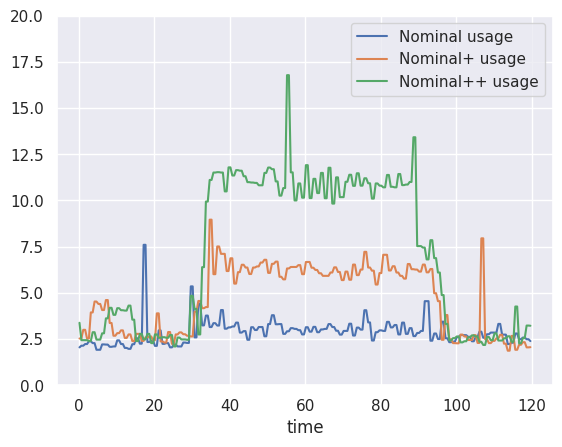

In [1003]:
import matplotlib.pyplot as plt

# Plot the values in the 'cpu' column
#df1.plot(y='cpu', label='First time period')
filtered_df_norm.set_index('time', inplace=True)
filtered_df_1.set_index('time', inplace=True)
filtered_df_2.set_index('time', inplace=True)

filtered_df_norm['cpu'].plot(y='CPU Percentage consumption', label='Nominal usage')
filtered_df_1['cpu'].plot(y='CPU Percentage consumption', label='Nominal+ usage')
filtered_df_2['cpu'].plot(y='CPU Percentage consumption', label='Nominal++ usage')

# Show the plot
# Add a legend to the plot
plt.legend()
plt.ylim(0, 20)

# Show the plot
plt.show()



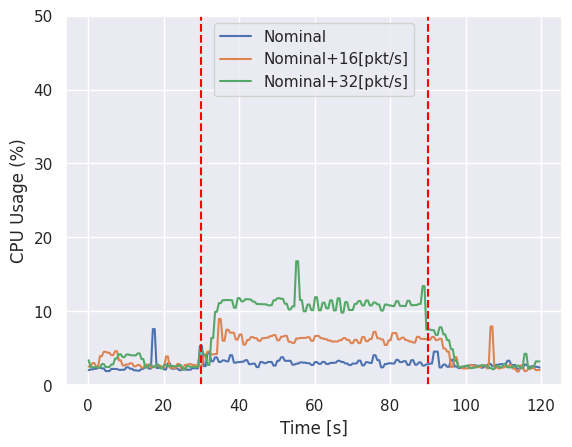

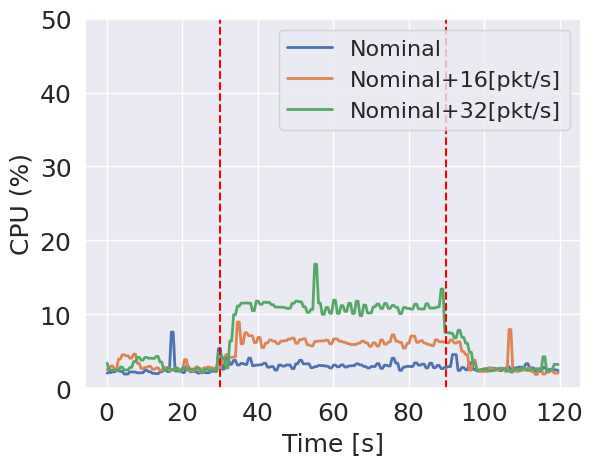

In [1004]:
filtered_df_norm_avg['cpu'].plot(y='CPU Percentage consumption', label='Nominal')
filtered_df_1_avg['cpu'].plot(y='CPU Percentage consumption', label='Nominal+16[pkt/s]')
filtered_df_2_avg['cpu'].plot(y='CPU Percentage consumption', label='Nominal+32[pkt/s]')
plt.axvline(x=30, color='red', linestyle='--')
plt.axvline(x=90, color='red', linestyle='--')

plt.xlabel('Time [s]')
plt.ylabel('CPU Usage (%)')

# Show the plot
# Add a legend to the plot
plt.legend()
plt.ylim(0, 50)


##
#   Another way to Plot
##


fig, ax = plt.subplots()
ax.plot(filtered_df_norm_avg['cpu'], linewidth=2.0, label='Nominal')
ax.plot(filtered_df_1_avg['cpu'], linewidth=2.0, label='Nominal+16[pkt/s]')
ax.plot(filtered_df_2_avg['cpu'], linewidth=2.0, label='Nominal+32[pkt/s]')

ax.set_xlabel('Time [s]', fontsize=18)
ax.set_ylabel('CPU (%)', fontsize=18)

ax.set_ylim(0, 50)
ax.axvline(x=30, color='red', linestyle='--')
ax.axvline(x=90, color='red', linestyle='--')

# Add a legend to the plot
legend = ax.legend(fontsize=16)

# Set the font size for the x and y labels and title
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(18)

# Show the plot
plt.show()

Feat extraxctor 5sec

In [1005]:
import pandas as pd
df = pd.read_csv ('/home/antonio/PCAP Repo/Presta/feat_dict.csv')

df=df[['time','cpu','ram','pram']]

df['cpu'] = (df['cpu'].str.replace('%', '')
             .astype(float))

df['ram'] = (df['ram'].str.replace("MiB / 909.6MiB", '')
             .astype(float))

df['pram'] = (df['pram'].str.replace('%', '')
             .astype(float))


df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f')



#df['time']-=init_time

df.head()

/tmp/ipykernel_182252/3644729459.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['ram'] = (df['ram'].str.replace("MiB / 909.6MiB", '')


,time,cpu,ram,pram
0,1900-01-01 10:31:02.665843,2.61,207.0,22.76
1,1900-01-01 10:31:03.159667,2.61,207.0,22.76
2,1900-01-01 10:31:03.658379,2.19,206.9,22.74
3,1900-01-01 10:31:04.158157,2.19,206.9,22.74
4,1900-01-01 10:31:04.659373,2.48,206.9,22.74


In [1006]:
start_time = pd.to_datetime('10:31:45.000000', format='%H:%M:%S.%f')
end_time = pd.to_datetime('10:33:05.000000', format='%H:%M:%S.%f')

filtered_df_norm = df[(df['time'] >= start_time) & (df['time'] <= end_time)]

filtered_df_norm['time']-=start_time

filtered_df_norm['time']=filtered_df_norm['time'].dt.total_seconds()

filtered_df_norm.head()

filtered_df_norm_avg = filter_avg(filtered_df_norm,30,90,wdw=7)

#filtered_df_norm_avg['cpu']=filtered_df_norm_avg['cpu'].rolling(window=5).mean()



/tmp/ipykernel_182252/1517085981.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_norm['time']-=start_time
/tmp/ipykernel_182252/1517085981.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_norm['time']=filtered_df_norm['time'].dt.total_seconds()
/tmp/ipykernel_182252/3333968579.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [1007]:
start_time = pd.to_datetime('10:35:17.000000', format='%H:%M:%S.%f')
end_time = pd.to_datetime('10:36:37.000000', format='%H:%M:%S.%f')

start_time = pd.to_datetime('10:41:50.000000', format='%H:%M:%S.%f')
end_time = pd.to_datetime('10:43:10.000000', format='%H:%M:%S.%f')

filtered_df_1 = df[(df['time'] >= start_time) & (df['time'] <= end_time)]


filtered_df_1['time']-=start_time
filtered_df_1['time']=filtered_df_1['time'].dt.total_seconds()

filtered_df_1_avg = filter_avg(filtered_df_1,30,90)

filtered_df_1.head()

/tmp/ipykernel_182252/3637633817.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_1['time']-=start_time
/tmp/ipykernel_182252/3637633817.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_1['time']=filtered_df_1['time'].dt.total_seconds()
/tmp/ipykernel_182252/3333968579.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,time,cpu,ram,pram
1295,0.158588,2.37,209.0,22.98
1296,0.658138,2.52,209.0,22.98
1297,1.159991,2.52,209.0,22.98
1298,1.658680,2.94,209.0,22.98
1299,2.158990,2.94,209.0,22.98


In [1008]:
start_time = pd.to_datetime('10:38:50.000000', format='%H:%M:%S.%f')
end_time = pd.to_datetime('10:40:10.000000', format='%H:%M:%S.%f')




#start_time = pd.to_datetime('10:42:25.000000', format='%H:%M:%S.%f')
#end_time = pd.to_datetime('10:44:55.000000', format='%H:%M:%S.%f')

filtered_df_2 = df[(df['time'] >= start_time) & (df['time'] <= end_time)]


filtered_df_2['time']-=start_time
filtered_df_2['time']=filtered_df_2['time'].dt.total_seconds()


filtered_df_2.head()

filtered_df_2_avg = filter_avg(filtered_df_2,30,90)

/tmp/ipykernel_182252/3464900024.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2['time']-=start_time
/tmp/ipykernel_182252/3464900024.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2['time']=filtered_df_2['time'].dt.total_seconds()
/tmp/ipykernel_182252/3333968579.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

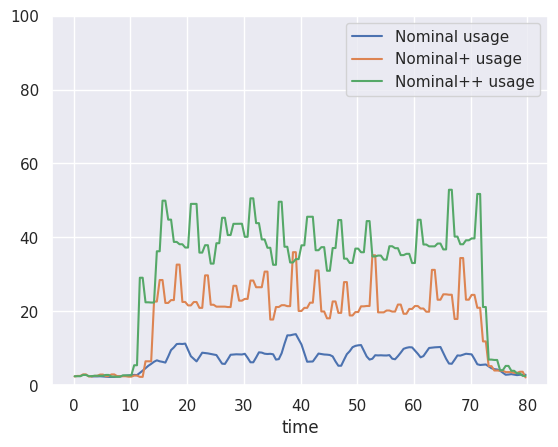

In [1009]:
import matplotlib.pyplot as plt

# Plot the values in the 'cpu' column
#df1.plot(y='cpu', label='First time period')
filtered_df_norm.set_index('time', inplace=True)
filtered_df_1.set_index('time', inplace=True)
filtered_df_2.set_index('time', inplace=True)

filtered_df_norm['cpu'].plot(y='CPU Percentage consumption', label='Nominal usage')
filtered_df_1['cpu'].plot(y='CPU Percentage consumption', label='Nominal+ usage')
filtered_df_2['cpu'].plot(y='CPU Percentage consumption', label='Nominal++ usage')

# Show the plot
# Add a legend to the plot
plt.legend()
plt.ylim(0, 100)

# Show the plot
plt.show()



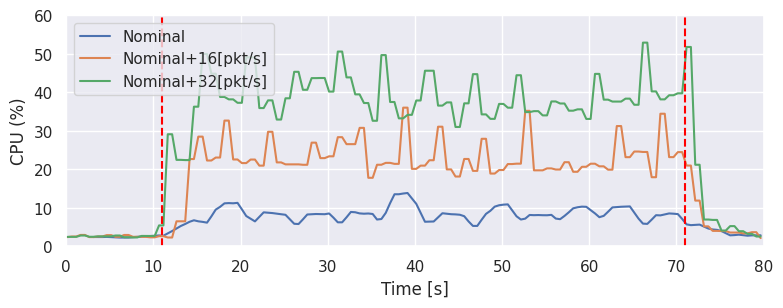

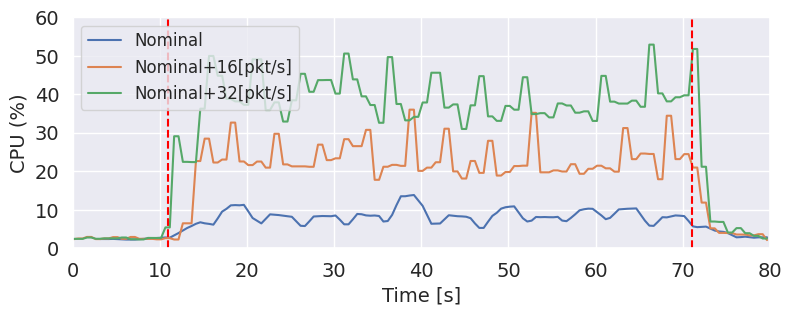

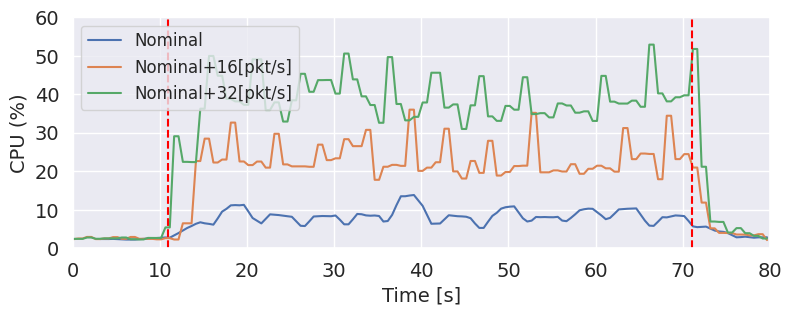

In [1010]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

plt.figure(figsize=(9,3))

filtered_df_norm_avg['cpu'].plot(y='CPU Percentage consumption', label='Nominal')
filtered_df_1_avg['cpu'].plot(y='CPU Percentage consumption', label='Nominal+16[pkt/s]')
filtered_df_2_avg['cpu'].plot(y='CPU Percentage consumption', label='Nominal+32[pkt/s]')



plt.axvline(x=11, color='red', linestyle='--')
plt.axvline(x=71, color='red', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('CPU (%)')

# Show the plot
# Add a legend to the plot
plt.legend()
plt.ylim(0, 60)
plt.xlim(0, 80)
#plt.title("CPU Usage on various Network Conditions")
#fig.set_figheight(5)
# Show the plot


##
#   Yet Another way to Plot
##
plt.figure(figsize=(9,3))

plt.plot(filtered_df_norm_avg['cpu'], linewidth=1.5, label='Nominal')
plt.plot(filtered_df_1_avg['cpu'], linewidth=1.5, label='Nominal+16[pkt/s]')
plt.plot(filtered_df_2_avg['cpu'], linewidth=1.5, label='Nominal+32[pkt/s]')

plt.xlabel('Time [s]', fontsize=14)
plt.ylabel('CPU (%)', fontsize=14)


plt.axvline(x=11, color='red', linestyle='--')
plt.axvline(x=71, color='red', linestyle='--')

plt.legend(fontsize=12)
plt.ylim(0, 60)
plt.xlim(0, 80)

for item in ([plt.gca().title, plt.gca().xaxis.label, plt.gca().yaxis.label] +
             plt.gca().get_xticklabels() + plt.gca().get_yticklabels()):
    item.set_fontsize(14)
    
    ##
#   Yet Another way to Plot
##
plt.figure(figsize=(9,3))

plt.plot(filtered_df_norm_avg['cpu'], linewidth=1.5, label='Nominal')
plt.plot(filtered_df_1_avg['cpu'], linewidth=1.5, label='Nominal+16[pkt/s]')
plt.plot(filtered_df_2_avg['cpu'], linewidth=1.5, label='Nominal+32[pkt/s]')

plt.xlabel('Time [s]', fontsize=14)
plt.ylabel('CPU (%)', fontsize=14)


plt.axvline(x=11, color='red', linestyle='--')
plt.axvline(x=71, color='red', linestyle='--')

plt.legend(fontsize=12)
plt.ylim(0, 100)
plt.xlim(0, 80)

for item in ([plt.gca().title, plt.gca().xaxis.label, plt.gca().yaxis.label] +
             plt.gca().get_xticklabels() + plt.gca().get_yticklabels()):
    item.set_fontsize(14)



plt.show()